<a href="https://colab.research.google.com/github/Lifeisforty2/Lifeisforty2.github.io/blob/main/Deep_Learning_CV_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
'''
Practice with Deep Learning
Computer Vision - convolutional Neural Network
Natural Language Processing - Recurrent Neural Network
'''

'\nPractice with Deep Learning\nComputer Vision - convolutional Neural Network\nNatural Language Processing - Recurrent Neural Network\n'

In [1]:
# importing all required libraries
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import os
from keras.datasets import reuters
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load the data - training as well as testing
#import the CIFAR-100 dataset from TensorFlow Datasets
#tfds.load returns a tf.data.Dataset object, which is a collection of elements, where each element is a pair of a dictionary of features (in this case, the image and its label) and a label
#The dataset is divided into 50,000 training images and 10,000 testing images of size 32x32, with 100 classes
#The images are in RGB format, with 3 channels per image
#The tfds.load function downloads and caches the data, and returns a tf.data.Dataset object
#The as_supervised=True argument loads the data in a 2-tuple structure (input, label) instead of a dictionary

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()


# Prepare the data that can be used by the next step - creating and training the DL model

# Normalize the data because the pixel values are in the range of 0 to 255 which is not suitable for the model to process
# Normalize the data by dividing by 255.0
train_images = train_images / 255.0
test_images = test_images / 255.0

# The data from TensforFlow and Keras will only have integer class labels. Each of those 100 integer class labels correspond to the following names, in the correct order
fine_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

# These are the string labels for the 20 superclasses. You may not need to use this at all, just provided here for reference.
coarse_labels = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']


170498071/170498071 [==============================] - 2s 0us/step


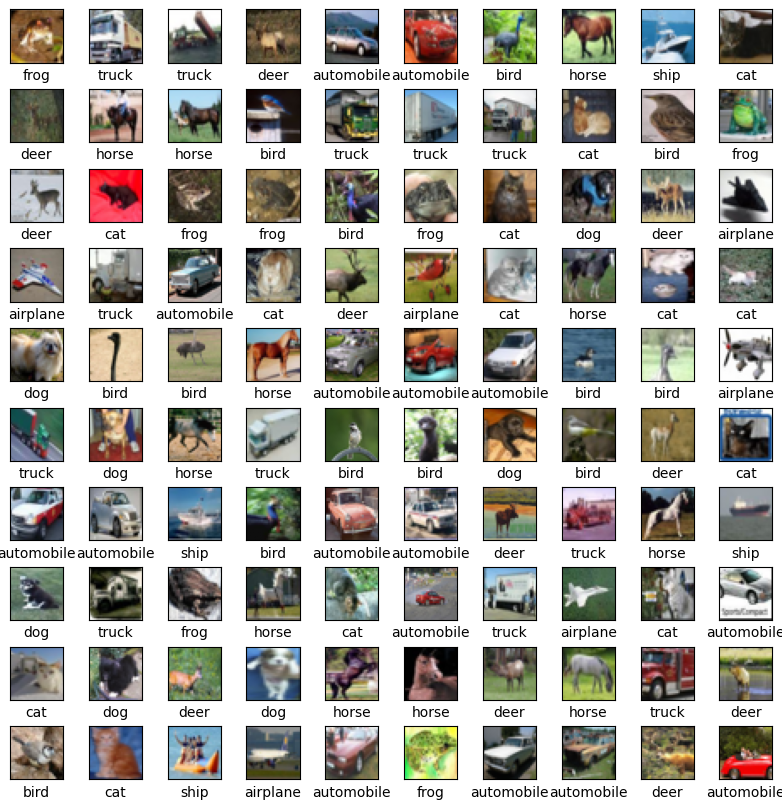

In [3]:
# Visualize the data by plotting 100 random images, one each for the 100 classes
# Draw 10 images in one row, 10 rows total
# plot 100 random images, one each for the 100 classes
# draw 10 images in one row, 10 rows total

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.subplots_adjust(hspace=0.5)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [ ]:
###############################################CNN MODEL CREATION##########################################
'''
Create a DL model for computer vision - convolutional Neural Network (Use TensorFlow and Keras)
'''

In [4]:
# Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')
# Create a Convolutional Neural Network (CNN) model
### as input, CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), # 32 filters, each of size 3x3
    tf.keras.layers.MaxPooling2D((2, 2)), # 2x2 max pooling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), # 64 filters, each of size 3x3
    tf.keras.layers.MaxPooling2D((2, 2)), # 2x2 max pooling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), # 64 filters, each of size 3x3
    tf.keras.layers.Flatten(), # flatten the output of the previous layer
    tf.keras.layers.Dense(64, activation='relu'), # 64 neurons
    tf.keras.layers.Dense(10) # 10 neurons
])

In [5]:
# Print the DL model summary
# use the model.summary() function to print the model summary
model.summary()
# the summary below shows the output of every convolutional and pooling layer is a 3D tensor od shape (height, width, channels).
# the width and heigh dimensions tend to shrink as you go deeper in the network.
# the number of output channels for each COnv2d layer is controlled by the first argument (e.g. 32 or 64)
# typically as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer
###############################################################################################################################
# to complete the model, i feed the last ouput tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification..
# Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor.
# first, i flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top.
# CIFAR has 10 output classes, so i use a final Dense layer with 10 outputs and a softmax activation.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
###############################################TRAINING##########################################
'''
train/fit the DL model using the training CIFAR-100 data
plot the training and validation accuracy/loss
'''

In [6]:
# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/"
checkpoint_path = "/content/drive/My Drive/Colab Notebooks/cifar/"

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                    save_weights_only=True,
                                                    verbose=1)
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
            validation_data=(test_images, test_labels),
            callbacks=[cp_callback])  # pass callback to training

Epoch 1/10
1563/1563 [==============================] - ETA: 0s - loss: 1.4851 - accuracy: 0.4575
Epoch 1: saving model to /content/drive/My Drive/Colab Notebooks/cifar/
1563/1563 [==============================] - 135s 86ms/step - loss: 1.4851 - accuracy: 0.4575 - val_loss: 1.2466 - val_accuracy: 0.5477
Epoch 2/10
1563/1563 [==============================] - ETA: 0s - loss: 1.1234 - accuracy: 0.6012
Epoch 2: saving model to /content/drive/My Drive/Colab Notebooks/cifar/
1563/1563 [==============================] - 112s 72ms/step - loss: 1.1234 - accuracy: 0.6012 - val_loss: 1.0591 - val_accuracy: 0.6322
Epoch 3/10
1562/1563 [============================>.] - ETA: 0s - loss: 0.9815 - accuracy: 0.6567
Epoch 3: saving model to /content/drive/My Drive/Colab Notebooks/cifar/
1563/1563 [==============================] - 101s 65ms/step - loss: 0.9815 - accuracy: 0.6566 - val_loss: 0.9503 - val_accuracy: 0.6665
Epoch 4/10
1562/1563 [============================>.] - ETA: 0s - loss: 0.8923 - a

In [7]:
# Train/fit the DL model using the training CIFAR-100 data
# show the accuracy on the test set
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy: {:5.2f}%'.format(100*test_acc))


313/313 - 4s - loss: 0.9110 - accuracy: 0.6942 - 4s/epoch - 14ms/step

Test accuracy: 69.42%


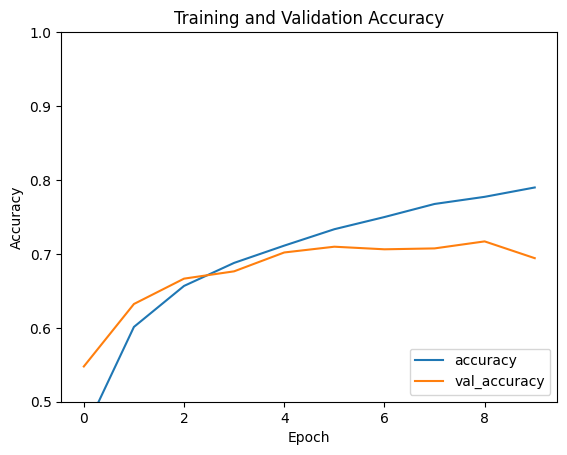

In [8]:
# Plot the training/validation accuracy and loss

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


In [9]:
###############################################TESTING##########################################
'''
Re-initialize the model
load the model weights from /path
Evaluate the trained DL model on the CIFAR-100 test data.
print accuracy
'''

'\nRe-initialize the model\nload the model weights from /path\nEvaluate the trained DL model on the CIFAR-100 test data.\nprint accuracy \n'

In [10]:
# Re-initialize the model
# Create a new instance of the model\
# Compile the model
# Load the weights from the checkpoint
# Re-evaluate the model
# Print the model accuracy
# use the model.evaluate() function to print the model accuracy
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), # 32 filters, each of size 3x3
    tf.keras.layers.MaxPooling2D((2, 2)), # 2x2 max pooling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), # 64 filters, each of size 3x3
    tf.keras.layers.MaxPooling2D((2, 2)), # 2x2 max pooling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), # 64 filters, each of size 3x3
    tf.keras.layers.Flatten(), # flatten the output of the previous layer
    tf.keras.layers.Dense(64, activation='relu'), # 64 neurons
    tf.keras.layers.Dense(10) # 10 neurons
])
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/cifar/"
# use the model.load_weights() function to load the model weights
# Loads the weights
model.load_weights(checkpoint_path)
# Re-evaluate the model
loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

313/313 - 5s - loss: 0.9110 - accuracy: 0.6942 - 5s/epoch - 15ms/step
Restored model, accuracy: 69.42%


In [11]:
############################################### NATURAL LANGUAGE PROCESSING - RNN ##########################################
'''
working with Reuters newswire classification dataset
load the data, using keras version
select the vocab size while loading
Prepare the data to be used
'''

'\nworking with Reuters newswire classification dataset\nload the data, using keras version\nselect the vocab size while loading\nPrepare the data to be used\n'

In [12]:
# Load the Reuters dataset - use the Keras version
#   Select the vocabulary size while loading the data
#   The data will be loaded as integer representations for each word
# consists of 11,228 newswires from Reuters, labeled over 46 topics

(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.reuters.load_data(num_words=10000)
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))
print("Test entries: {}, labels: {}".format(len(test_data), len(test_labels)))
print(train_data[10])

2110848/2110848 [==============================] - 0s 0us/step
Training entries: 8982, labels: 8982
Test entries: 2246, labels: 2246
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [13]:
from tensorflow.keras.utils import to_categorical
# Prepare the data to be used for the next steps
#   Each data entry (newswire) can be of different lengths
#   Make each newswire consistent - same number of words
#   'Pad' words (say 0) to get to the standard length or remove words
#prepare the data
#   Vectorize the data - convert the integer sequences to a binary matrix
#   Use the to_categorical() function from Keras
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # create an all zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # set specific indices of results[i] to 1s
    return results
# Vectorize the training data
x_train = vectorize_sequences(train_data)
# Vectorize the test data
x_test = vectorize_sequences(test_data)
# Vectorize the training labels
one_hot_train_labels = to_categorical(train_labels)
# Vectorize the test labels
one_hot_test_labels = to_categorical(test_labels)
print(x_train[10])

[0. 1. 0. ... 0. 0. 0.]


In [14]:
###############################################RNN - MODEL CREATION##########################################
'''
create a DL model for nlp-rnn/LSTM/GRU
print the model summary
'''

'\ncreate a DL model for nlp-rnn/LSTM/GRU\nprint the model summary\n'

In [15]:
# Build the DL model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10000,)), # 64 neurons
    tf.keras.layers.Dense(64, activation='relu'), # 64 neurons
    tf.keras.layers.Dense(46, activation='softmax') # 46 neurons
])

In [16]:
# show the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                640064    
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 46)                2990      
                                                                 
Total params: 647214 (2.47 MB)
Trainable params: 647214 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
###############################################TRAINING##########################################
'''
train and fit the DL model using the training reuters data
plot the training and validation accuracy/loss
save it to /path in notbook
'''

'\ntrain and fit the DL model using the training reuters data\nplot the training and validation accuracy/loss\nsave it to /path in notbook\n'

In [19]:
# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/"
checkpoint_path = "/content/drive/My Drive/Colab Notebooks/reuters/"
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                    save_weights_only=True,
                                                    verbose=1)

In [20]:
# Train/fit the DL model using the training Reuters data
# train and fit the model using the training data
# Compile the model
model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train/fit the DL model using the training Reuters data
# show the accuracy on the test set
history = model.fit(x_train,
                    one_hot_train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, one_hot_test_labels),
                    callbacks=[cp_callback])  # pass callback to training

results = model.evaluate(x_test, one_hot_test_labels)
print(results)
#show the accuracy on the test set
test_loss, test_acc = model.evaluate(x_test, one_hot_test_labels, verbose=2)
print('\nTest accuracy: {:5.2f}%'.format(100*test_acc))


Epoch 1/20
18/18 [==============================] - ETA: 0s - loss: 2.6573 - accuracy: 0.5150
Epoch 1: saving model to /content/drive/My Drive/Colab Notebooks/reuters/
18/18 [==============================] - 4s 198ms/step - loss: 2.6573 - accuracy: 0.5150 - val_loss: 1.8083 - val_accuracy: 0.6273
Epoch 2/20
17/18 [===========================>..] - ETA: 0s - loss: 1.5043 - accuracy: 0.6870
Epoch 2: saving model to /content/drive/My Drive/Colab Notebooks/reuters/
18/18 [==============================] - 1s 70ms/step - loss: 1.5026 - accuracy: 0.6869 - val_loss: 1.4021 - val_accuracy: 0.6870
Epoch 3/20
17/18 [===========================>..] - ETA: 0s - loss: 1.1453 - accuracy: 0.7497
Epoch 3: saving model to /content/drive/My Drive/Colab Notebooks/reuters/
18/18 [==============================] - 1s 67ms/step - loss: 1.1448 - accuracy: 0.7504 - val_loss: 1.2102 - val_accuracy: 0.7280
Epoch 4/20
17/18 [===========================>..] - ETA: 0s - loss: 0.9415 - accuracy: 0.7941
Epoch 4: sa

In [ ]:
# Plot the training/validation accuracy and loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf() # clear the figure
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
###############################################TESTING AND EVALUATION##########################################
'''
Re-initialize the model
load the weights saved at /path
evaluate the trained DL model on Reuters test dataset
print the accuracy
'''

In [ ]:
# Re-initialize the model
# re-initialize the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10000,)), # 64 neurons
    tf.keras.layers.Dense(64, activation='relu'), # 64 neurons
    tf.keras.layers.Dense(46, activation='softmax') # 46 neurons
])
# Compile the model
model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/reuters/"\
# use the model.load_weights() function to load the model weights
# Loads the weights
model.load_weights(checkpoint_path)

In [ ]:
# Evaluate the trained DL model on the Reuters test dataset
# evaluate the model on the test data
results = model.evaluate(x_test, one_hot_test_labels)
print(results)
#show the accuracy on the test set
loss,acc = model.evaluate(x_test,  one_hot_test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

In [ ]:
# sources/citation

Shanekonaung. (2021). Reuters dataset using Keras. Kaggle. Retrieved May 1, 2023, from https://www.kaggle.com/code/shanekonaung/reuters-dataset-using-keras
https://medium.com/@minhao_chen/rnn-with-reuters-dataset-228ddc9d1f42
https://github.com/anksng/Reuters-newswire-dataset-Classification/blob/master/Reuters.ipynb
https://www.coursehero.com/tutors-problems/Artificial-Intelligence/46875268-Natural-Language-Processing-RNN-The-goal-of-this-task-is-to/
https://www.tensorflow.org/tutorials/images/cnn
https://ai.plainenglish.io/building-a-cnn-model-from-scratch-using-tensorflow-and-keras-a-beginners-guide-37b118912363

